In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv("forestfires.csv")

In [3]:
dt.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
dt.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
dt.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


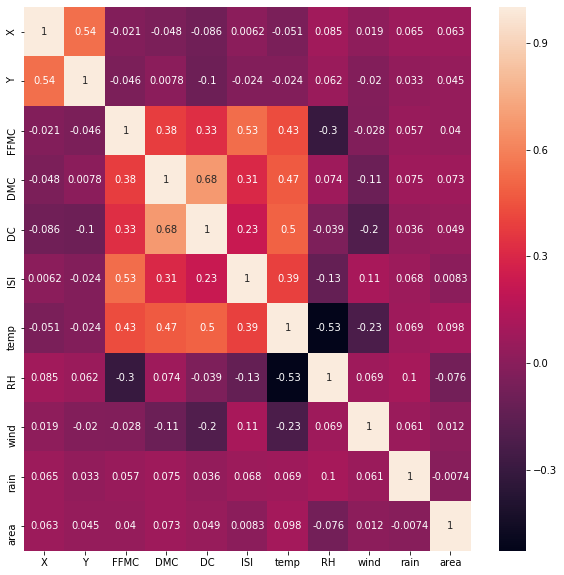

In [7]:
plt.figure(figsize=(10,10))
corr= dt.corr()
sns.heatmap(corr,annot=True)

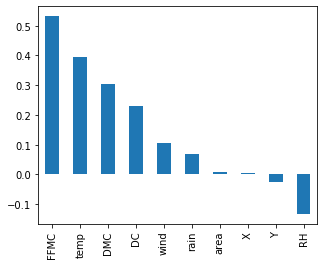

In [8]:
corr_with_isi = dt.corr()['ISI'].sort_values(ascending=False)
plt.figure(figsize=(5,4))
corr_with_isi.drop('ISI').plot.bar()
plt.show();

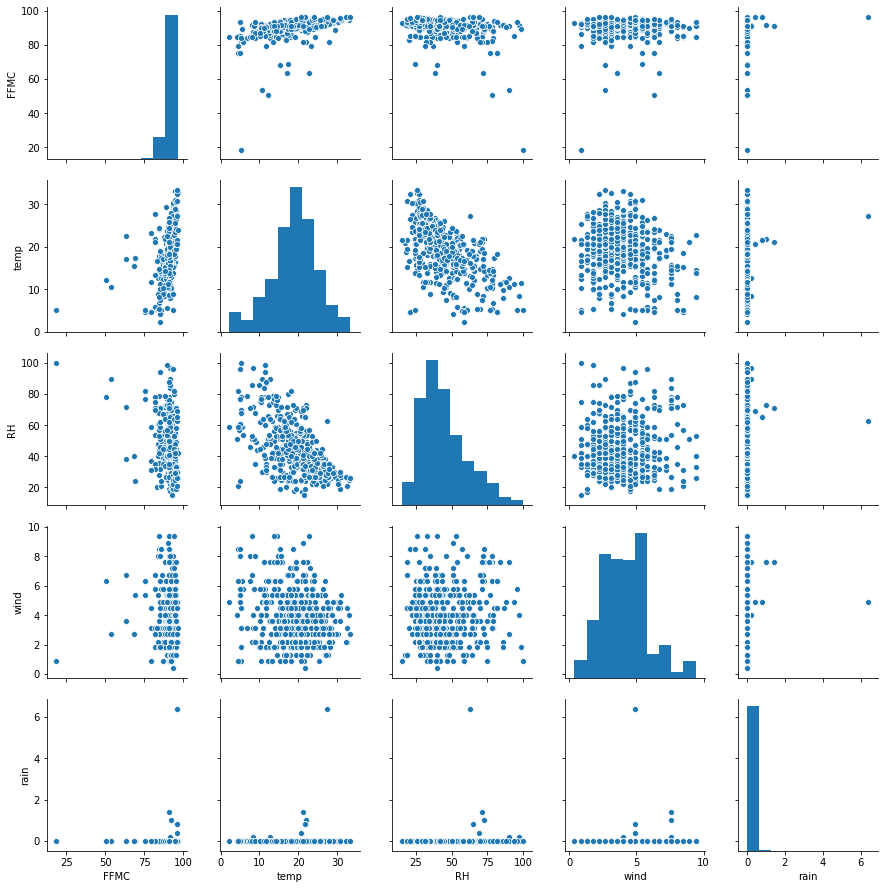

In [9]:
sns.pairplot(dt[['FFMC', 'temp', 'RH', 'wind', 'rain']])
plt.show()

In [10]:
dt = pd.get_dummies(dt, prefix=['month','day'],drop_first=True)


In [11]:
dt.shape

(517, 28)

In [12]:
y = dt.iloc[:,[27]].values
x = dt.iloc[:,:-1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size = 0.25,random_state= 42)

In [14]:
# Fitting Extra Tree Regressor to the dataset

from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

C:\Users\tejar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


ExtraTreesRegressor(n_estimators=10, random_state=0)

In [15]:
print(y_test.shape, y_train.shape)


(130, 1) (387, 1)


In [16]:
y_pred = regressor.predict(x_test)


In [17]:
from sklearn import metrics
print('mean_absolute_error : {} '.format(metrics.mean_absolute_error(y_test, y_pred)))
print('mean_squared_error : {} '.format(metrics.mean_squared_error(y_test, y_pred)))
print('mean_squared_error : {} '.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

mean_absolute_error : 0.0 
mean_squared_error : 0.0 
mean_squared_error : 0.0 


In [18]:
regressor.score(x, y)


1.0